In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Importing the data from the csv file

In [27]:
data = pd.read_csv('Data/India_COVID_data.csv')
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [28]:
data['date'] = data['date'].apply(lambda x: x.split('/')[1]+'/'+x.split('/')[0]+'/'+x.split('/')[2])
data['date'] = pd.to_datetime(data['date'], format="%d/%m/%Y")

We convert the date of the dataframe to ordinal number, so we can use it for the machine learning models

In [29]:
import datetime as dt
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].map(dt.datetime.toordinal)

Selecting data for COVID cases alone

In [30]:
cases = data[['date', 'total_cases', 'new_cases', 'total_deaths','new_deaths', 'population']]
cases.head(5)

,date,total_cases,new_cases,total_deaths,new_deaths,population
0,737454,1,1,0,0,1393409033
1,737455,1,0,0,0,1393409033
2,737456,1,0,0,0,1393409033
3,737457,2,1,0,0,1393409033
4,737458,3,1,0,0,1393409033


Looking at total_cases vs total_deaths

In [31]:
cases['mortality'] = (cases['total_deaths']/cases['total_cases'])*100
cases.head(50)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,date,total_cases,new_cases,total_deaths,new_deaths,population,mortality
0,737454,1,1,0,0,1393409033,0.000000
1,737455,1,0,0,0,1393409033,0.000000
2,737456,1,0,0,0,1393409033,0.000000
3,737457,2,1,0,0,1393409033,0.000000
4,737458,3,1,0,0,1393409033,0.000000
5,737459,3,0,0,0,1393409033,0.000000
6,737460,3,0,0,0,1393409033,0.000000
7,737461,3,0,0,0,1393409033,0.000000
8,737462,3,0,0,0,1393409033,0.000000
9,737463,3,0,0,0,1393409033,0.000000


Since the first death reported due to COVID-19 occured on 11/3/2020, there is no mortality before that (0% percent of the people affected by COVID-19 had died)
Shows the likelihood of dying if you contract COVID

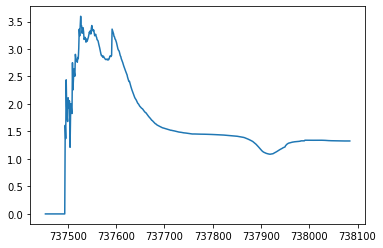

In [32]:
plt.plot(cases['date'],cases['mortality'])
plt.show()

In [33]:
cases.corr(method='pearson')

,date,total_cases,new_cases,total_deaths,new_deaths,population,mortality
date,1.000000,0.945261,0.324655,0.948565,0.331372,NaN,-0.355942
total_cases,0.945261,1.000000,0.266503,0.995658,0.347450,NaN,-0.395336
new_cases,0.324655,0.266503,1.000000,0.200521,0.836412,NaN,-0.227794
total_deaths,0.948565,0.995658,0.200521,1.000000,0.281514,NaN,-0.387111
new_deaths,0.331372,0.347450,0.836412,0.281514,1.000000,NaN,-0.185906
population,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mortality,-0.355942,-0.395336,-0.227794,-0.387111,-0.185906,NaN,1.000000


<AxesSubplot:>

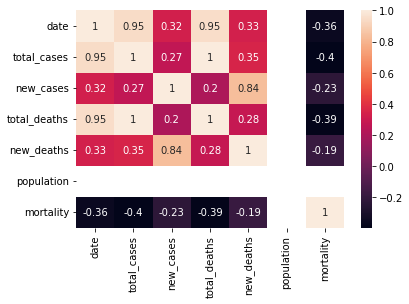

In [34]:
sns.heatmap(cases.corr(), annot=True)

In [35]:
correlation_mat = cases.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

date          date            1.000000
              total_cases     0.999781
              new_cases       0.988740
              total_deaths    0.999248
              new_deaths      0.892690
              population           NaN
              mortality       0.999570
total_cases   date            0.999781
              total_cases     1.000000
              new_cases       0.989084
              total_deaths    0.999790
              new_deaths      0.892944
              population           NaN
              mortality       0.999954
new_cases     date            0.988740
              total_cases     0.989084
              new_cases       1.000000
              total_deaths    0.988999
              new_deaths      0.897626
              population           NaN
              mortality       0.989096
total_deaths  date            0.999248
              total_cases     0.999790
              new_cases       0.988999
              total_deaths    1.000000
              new_deaths 

Removing variables which relate to themselves

In [36]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

sorted_pairs = sorted_pairs[abs(sorted_pairs)<1]

sorted_pairs

new_deaths    total_deaths    0.892569
total_deaths  new_deaths      0.892569
date          new_deaths      0.892690
new_deaths    date            0.892690
              mortality       0.892852
mortality     new_deaths      0.892852
new_deaths    total_cases     0.892944
total_cases   new_deaths      0.892944
new_deaths    new_cases       0.897626
new_cases     new_deaths      0.897626
date          new_cases       0.988740
new_cases     date            0.988740
total_deaths  new_cases       0.988999
new_cases     total_deaths    0.988999
total_cases   new_cases       0.989084
new_cases     total_cases     0.989084
              mortality       0.989096
mortality     new_cases       0.989096
total_deaths  date            0.999248
date          total_deaths    0.999248
              mortality       0.999570
mortality     date            0.999570
total_cases   date            0.999781
date          total_cases     0.999781
total_deaths  total_cases     0.999790
total_cases   total_death

Looking at the strongly related variables

In [37]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
strong_pairs

new_deaths    total_deaths    0.892569
total_deaths  new_deaths      0.892569
date          new_deaths      0.892690
new_deaths    date            0.892690
              mortality       0.892852
mortality     new_deaths      0.892852
new_deaths    total_cases     0.892944
total_cases   new_deaths      0.892944
new_deaths    new_cases       0.897626
new_cases     new_deaths      0.897626
date          new_cases       0.988740
new_cases     date            0.988740
total_deaths  new_cases       0.988999
new_cases     total_deaths    0.988999
total_cases   new_cases       0.989084
new_cases     total_cases     0.989084
              mortality       0.989096
mortality     new_cases       0.989096
total_deaths  date            0.999248
date          total_deaths    0.999248
              mortality       0.999570
mortality     date            0.999570
total_cases   date            0.999781
date          total_cases     0.999781
total_deaths  total_cases     0.999790
total_cases   total_death

<AxesSubplot:xlabel='total_cases', ylabel='mortality'>

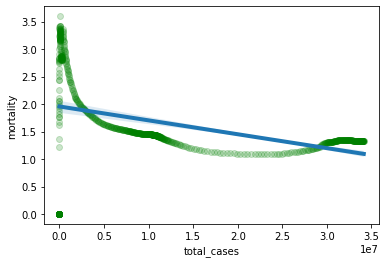

In [38]:
sns.regplot(x='total_cases', y='mortality', data=cases, scatter_kws = {'color': 'g',  'alpha':0.2}, line_kws={'lw':4})

Mortality shows a steep incline as the total_cases kept rising

In [39]:
vaccines = data[['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations', 'new_vaccinations']]
vaccines['mortality'] = cases['mortality']
vaccines = vaccines.loc[351:]
vaccines

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,new_vaccinations,mortality
351,737805,10542841,15158,152093,175,0,0,1.442619
352,737806,10557985,15144,152274,181,191181,191181,1.442264
353,737807,10571773,13788,152419,145,224301,33120,1.441754
354,737808,10581823,10050,152556,137,454049,229748,1.441680
355,737809,10595639,13816,152718,162,674835,220786,1.441329
...,...,...,...,...,...,...,...,...
626,738080,34081315,13596,452290,166,976344696,3658554,1.327091
627,738081,34094373,13058,452454,164,978954738,2610042,1.327064
628,738082,34108996,14623,452651,197,987113051,8158313,1.327072
629,738083,34127450,18454,452811,160,997399032,10285981,1.326823


In [40]:
vaccines.dtypes

date                    int64
total_cases             int64
new_cases               int64
total_deaths            int64
new_deaths              int64
total_vaccinations      int64
new_vaccinations        int64
mortality             float64
dtype: object

<AxesSubplot:ylabel='new_vaccinations'>

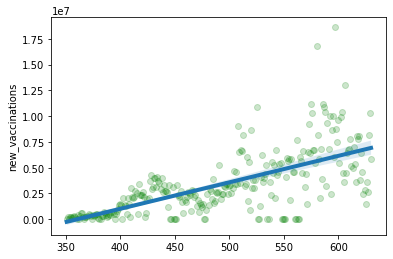

In [41]:
sns.regplot(x=vaccines.index, y='new_vaccinations', data=vaccines, scatter_kws = {'color': 'g',  'alpha':0.2}, line_kws={'lw':4})

India had a very rocky vaccination drive since its start in 16/1/2021. The trend is increasing

In [42]:
from sklearn.model_selection import train_test_split
X = vaccines[['date']]
Y = vaccines[['new_vaccinations']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.10, random_state=0)

In [43]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train,Y_train)
DT_predict = DT_model.predict(X_test)

In [44]:
from sklearn.neighbors import KNeighborsRegressor
KNN_model = KNeighborsRegressor(n_neighbors=3).fit(X_train,Y_train)
KNN_predict = KNN_model.predict(X_test)

In [45]:
from sklearn.metrics import r2_score
DT_acc = r2_score(Y_test, DT_predict)
print(DT_acc)

-0.042388906599854836


In [46]:
from sklearn.metrics import r2_score
KNN_acc = r2_score(Y_test, KNN_predict)
print(KNN_acc)

0.35923628333199153


Now lets look at whether the vaccinations have helped slow down the rate of the infection in India.

<AxesSubplot:>

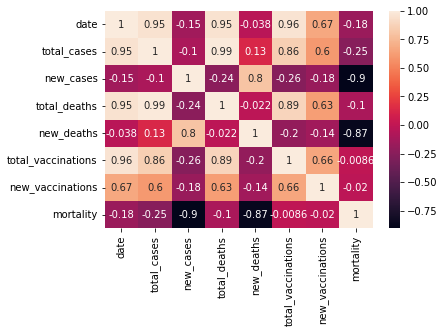

In [47]:
sns.heatmap(vaccines.corr(), annot=True)

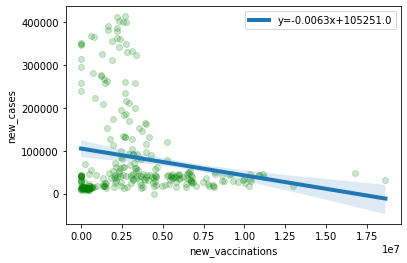

In [48]:
slope, intercept, r_value, p_value, std_err = stats.linregress(vaccines['new_vaccinations'], vaccines['new_cases'])
ax = sns.regplot(x='new_vaccinations', y='new_cases', data=vaccines, scatter_kws = {'color': 'g',  'alpha':0.2}, line_kws={'lw':4, 'label':"y={0:.4f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.show()

We can see that as the number of new vaccinations increase, the number of new cases is decreasing, which indicates that the vaccines do help in reducing the spread of the infection. The slope of the regression line is negative, indicating a decrease in new_cases with respect to new_vaccinations.

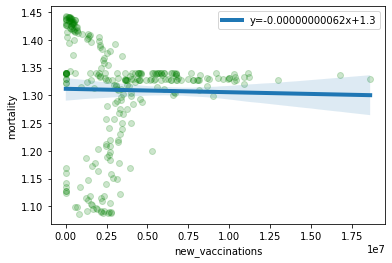

In [49]:
slope, intercept, r_value, p_value, std_err = stats.linregress(vaccines['new_vaccinations'], vaccines['mortality'])
ax = sns.regplot(x='new_vaccinations', y='mortality', data=vaccines, scatter_kws = {'color': 'g',  'alpha':0.2}, line_kws={'lw':4, 'label':"y={0:.11f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.show()

We see that there is indeed a decrease in mortality with an increase in new_vaccinations, but the slope of the regression line(i.e., how fast mortality decreases with an increase in new_vaccinations) is quite minute, with an order of -10.